In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

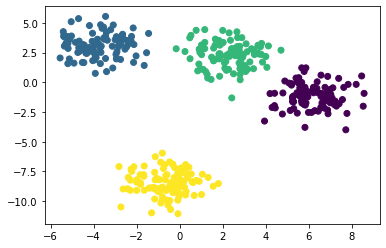

In [2]:
num_center = 4
X,y = make_blobs(400,2,centers=num_center)
plt.scatter(X[:,0],X[:,1], c=y)
# plt.xlim((-20,20))
# plt.ylim((-20,20))
plt.show()

In [21]:
def func_cluster(numOfSample, X, local_centroid): 
    X_label = []
    for i in range(numOfSample):
        dist = []
        for cluster_idx in range(K):
            dist.append(np.linalg.norm(X[i,:]-local_centroid[cluster_idx]))

        dist_min = min(dist)
        dist_min_idx = dist.index(dist_min)
        X_label.append(dist_min_idx)
    return X_label

def func_Update(numOfSample, numOfCluster, X, X_label, local_centroid):
    new_centroid = []
    for cluster_idx in range(numOfCluster):
        centroid_x, centroid_y = 0, 0
        cnt = 0
        for i in range(numOfSample):
            if X_label[i] == cluster_idx:
                cnt += 1
                centroid_x += X[i, 0]
                centroid_y += X[i, 1]
        if not cnt == 0:
            centroid_x, centroid_y = centroid_x/cnt, centroid_y/cnt
        else:
            centroid_x, centroid_y = local_centroid[cluster_idx][0], local_centroid[cluster_idx][1]
        new_centroid.append(np.array((centroid_x, centroid_y)))
    return new_centroid

def Kmeans(X, numOfCluster, numOfIter):
    # initialize the local centroid
    numOfSample = X.shape[0]

    X_min, X_max = np.min(X), np.max(X)
    K = numOfCluster
    local_centroid = []
    for i in range(K):
        local_centroid.append(np.array((np.random.random_integers(X_min, X_max), np.random.random_integers(X_min, X_max))))

    print(local_centroid)

    for itr_idx in range(numOfIter):
        X_label = func_cluster(numOfSample, X, local_centroid)
        # print(X_label)
        new_centroid = func_Update(numOfSample, numOfCluster, X, X_label, local_centroid)
        local_centroid = new_centroid

    return local_centroid

local_centroid = Kmeans(X, numOfCluster=num_center, numOfIter=10)
print(local_centroid)


[array([-5,  2]), array([-8, -9]), array([-8,  5]), array([-4,  0])]
[array([2.30239072, 2.27168842]), array([-0.61491332, -8.47665651]), array([-3.77820718,  3.10458552]), array([ 6.16511889, -1.13523263])]


/Users/xiaoranzhang/opt/anaconda3/envs/Xiaoran/lib/python3.7/site-packages/ipykernel_launcher.py:38: DeprecationWarning: This function is deprecated. Please call randint(-11.072812457164222, 8.58357776627148 + 1) instead


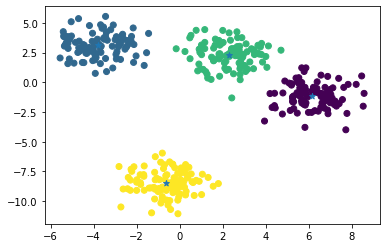

In [22]:
plt.scatter(X[:,0],X[:,1], c=y)
# plt.xlim((-20,20))
# plt.ylim((-20,20))
local_centroid = np.array(local_centroid)
plt.scatter(local_centroid[:,0], local_centroid[:,1],marker='*')
plt.show()